In [1]:
using Crystalline, MPBUtils, JLD2, LinearAlgebra, StaticArrays, SymmetryBases, PyPlot, DelimitedFiles, PrettyTables

In [2]:
using PyCall
np = pyimport("numpy")

PyObject <module 'numpy' from '/home/gridsan/aligho/.local/lib/python3.8/site-packages/numpy/__init__.py'>

In [41]:
# First we create the k mesh
ks = Vector{Vector{Float64}}()
N = 50
K1 = [0, 1/2]
K2 = [1/2, 0]

open("wilson_loops/c4-concentric-berry-ks-loops.sh", "w") do io 
    write(io, "berry-ks-loops=(list")
    for α in range(0, 1, length=10)
    write(io, " (list ")
    for i in 1:N # From gamma to alpha*K1*(N-1)/N
        k1 = (i-1)/N*K1*α
        k2 = zeros(2)
        kx, ky = k1 + k2
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # From alpha*K1 to alpha*K1+alpha*K2*(N-1)/N
        k1 = K1*α
        k2 = (i-1)/N*K2*α
        kx, ky = k1 + k2
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # from alpha*K1 + alpha*K2 to alpha*1/N*K1 + K2*alpha
        k1 = K1*α - (i-1)/N*K1*α
        k2 = K2*α
        kx, ky = k1 + k2
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N+1 # from K2*alpha to 0
        k1 = zeros(2)
        k2 = K2*α - (i-1)/N*K2*α
        kx, ky = k1 + k2
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    write(io, ")")
    end
    write(io, ")")
end

1

# "Concentric" Wilson Loops

In [33]:
# First we create the k mesh
ks = Vector{Vector{Float64}}()
N = 20
K1 = [2/3, -1/3]
K2 = [-1/3, 2/3]

open("wilson_loops/c3-concentric-berry-ks-loops.sh", "w") do io 
    write(io, "berry-ks-loops=(list")
    for α in range(0, 1, length=30)
    write(io, " (list ")
    for i in 1:N # From gamma to alpha*K1*(N-1)/N
        k1 = (i-1)/N*K1*α
        k2 = zeros(2)
        kx, ky = k1 + k2
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # From alpha*K1 to alpha*K1+alpha*K2*(N-1)/N
        k1 = K1*α
        k2 = (i-1)/N*K2*α
        kx, ky = k1 + k2
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # from alpha*K1 + alpha*K2 to alpha*1/N*K1 + K2*alpha
        k1 = K1*α - (i-1)/N*K1*α
        k2 = K2*α
        kx, ky = k1 + k2
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N+1 # from K2*alpha to 0
        k1 = zeros(2)
        k2 = K2*α - (i-1)/N*K2*α
        kx, ky = k1 + k2
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    write(io, ")")
    end
    write(io, ")")
end

1

In [3]:
# First we create the k mesh
ks = Vector{Vector{Float64}}()
N = 20
open("wilson_loops/berry-ks-loops.sh", "w") do io 
    write(io, "berry-ks-loops=(list (list ")
    for i in 1:N+1 # From (0, 0) to (0.5 0.5)
        kx = (i-1)/N*0.5
        ky = (i-1)/N*0.5
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # to (-0.5, 0.5)
        kx = 0.5 - i/N
        ky = 0.5 
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # to (0, 0) one again buddy
        kx = -0.5 + i/N*0.5
        ky = 0.5 - i/N*0.5
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    write(io, "))")
end

2

In [15]:
# Two different paths through k space

ks = Vector{Vector{Float64}}()
N = 100
open("wilson_loops/berry-ks-loops.sh", "w") do io 
    write(io, "berry-ks-loops=(list (list ")
    for i in 1:N+1 # From (0, 0) to (0.5 0.5)
        kx = (i-1)/N*0.5
        ky = (i-1)/N*0.5
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # to (-0.5, 0.5)
        kx = 0.5 - i/N
        ky = 0.5 
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # to (0, 0) one again buddy
        kx = -0.5 + i/N*0.5
        ky = 0.5 - i/N*0.5
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    write(io, ") ")
    
    write(io, "(list ")
    for i in 1:N+1 # From (0, 0) to (0.5 0.5)
        kx = 0
        ky = (i-1)/N*0.5
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # to (-0.5, 0.5)
        kx = i/N*0.5
        ky = 0.5 
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # to (0, 0) one again buddy
        kx = 0.5 
        ky = 0.5 - i/N*0.5
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # to (0, 0) one again buddy
        kx = 0.5 - i/N*0.5 
        ky = 0
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    write(io, "))")
end

2

In [20]:
# Two different paths through k space

ks = Vector{Vector{Float64}}()
N = 20
extent = 0.49
open("wilson_loops/berry-ks-loops.sh", "w") do io 
    write(io, "berry-ks-loops=(list (list ")
    for i in 1:N+1 # From (0, 0) to (0.5 0.5)
        kx = 0
        ky = (i-1)/N*extent
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N 
        kx = i/N*extent
        ky = extent
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # to (0, 0) one again buddy
        kx = extent
        ky = extent - i/N*extent
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # to (0, 0) one again buddy
        kx = extent - i/N*extent
        ky = 0
        write(io, "(vector3 $(kx) $(ky)) ")
        push!(ks, [kx, ky])
    end
    write(io, "))")
end

2

In [5]:
# Two different paths through k space

ks = Vector{Vector{Float64}}()
N = 20
extent = 0.05
x = -0.5 - extent/2
y = -0.48 - extent/2

open("wilson_loops/berry-ks-loops.sh", "w") do io 
    write(io, "berry-ks-loops=(list (list ")
    for i in 1:N+1 # From (0, 0) to (0.5 0.5)
        kx = 0
        ky = (i-1)/N*extent
        write(io, "(vector3 $(kx + x) $(ky + y)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N 
        kx = i/N*extent
        ky = extent
        write(io, "(vector3 $(kx + x) $(ky +y)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # to (0, 0) one again buddy
        kx = extent
        ky = extent - i/N*extent
        write(io, "(vector3 $(kx + x) $(ky + y)) ")
        push!(ks, [kx, ky])
    end
    for i in 1:N # to (0, 0) one again buddy
        kx = extent - i/N*extent
        ky = 0
        write(io, "(vector3 $(kx + x) $(ky +y)) ")
        push!(ks, [kx, ky])
    end
    write(io, "))")
end

2

In [16]:
# Two different paths through k space

ks = Vector{Vector{Float64}}()
N = 20

open("wilson_loops/berry-ks-loops.sh", "w") do io 
    write(io, "berry-ks-loops=(list ")
    for i in 1:N+1
        kx = -0.5 + (i-1)/N
        write(io, " (list ")
        for j in 1:N+1 # From (0, 0) to (0.5 0.5)
            ky = -0.5 + (j-1)/N
            write(io, "(vector3 $(kx) $(ky)) ")
            push!(ks, [kx, ky])
        end
        write(io, ")")
    end
    write(io, ")")
end

1

In [23]:
JLD2_DATA = Dict{Tuple{Integer, Integer, String}, Dict{String, Any}}()
sg = 13
for mode in  ["tm"] #["te", "tm"]
    println("Analyzing mode: $mode\n")
    flush(stdout)
    for id_eps in 1:1
        println("Analyzing id_eps : ", id_eps)
        flush(stdout)
        dir = "./symeigs/output/sg$(sg)/eps$(id_eps)/$(mode)/"
        filename = dir*"sg$(sg)-epsid$(id_eps)-res64-$(mode).jld2"
        loaded_data = load(filename)
        JLD2_DATA[(sg, id_eps, mode)] = loaded_data
    end
end


Analyzing mode: tm

Analyzing id_eps : 1


In [29]:
JLD2_DATA[13, 1, "tm"]["summariesv"][7966]

23-element Vector{BandSummary}:
 1-band (trivial): [KA₃, Γ₁, K₂]
 1-band (trivial): [KA₂, Γ₁, K₃]
 2-band (trivial): [KA₁+KA₂, Γ₂Γ₃, K₁+K₃]
 1-band (trivial): [KA₃, Γ₁, K₂]
 2-band (fragile): [2KA₁, Γ₂Γ₃, 2K₁]
 1-band (trivial): [KA₂, Γ₁, K₃]
 2-band (trivial): [KA₁+KA₃, Γ₂Γ₃, K₁+K₂]
 2-band (trivial): [KA₂+KA₃, Γ₂Γ₃, K₂+K₃]
 1-band (trivial): [KA₁, Γ₁, K₁]
 2-band (trivial): [KA₁+KA₂, Γ₂Γ₃, K₁+K₃]
 1-band (trivial): [KA₃, Γ₁, K₂]
 2-band (trivial): [KA₂+KA₃, Γ₂Γ₃, K₂+K₃]
 1-band (trivial): [KA₃, Γ₁, K₂]
 1-band (trivial): [KA₁, Γ₁, K₁]
 2-band (trivial): [KA₁+KA₂, Γ₂Γ₃, K₁+K₃]
 1-band (trivial): [KA₃, Γ₁, K₂]
 3-band (trivial): [KA₁+KA₂+KA₃, Γ₁+Γ₂Γ₃, K₁+K₂+K₃]
 1-band (trivial): [KA₂, Γ₁, K₃]
 2-band (trivial): [KA₂+KA₃, Γ₂Γ₃, K₂+K₃]
 3-band (trivial): [2KA₁+KA₃, Γ₁+Γ₂Γ₃, 2K₁+K₂]
 2-band (trivial): [KA₂+KA₃, Γ₂Γ₃, K₂+K₃]
 4-band (trivial): [2KA₁+2KA₂, 2Γ₁+Γ₂Γ₃, 2K₁+2K₃]
 2-band (trivial): [KA₁+KA₃, Γ₂Γ₃, K₁+K₂]

In [345]:
good_candidates = Int[]
good_candidates_band = Int[]
margins = Float64[]

sg = 12
mode = "tm"
num_fragile_bands = 4

for id_eps in 1:1
    println("Doing id_eps $(id_eps)"); flush(stdout)
    data = JLD2_DATA[sg, id_eps, mode]
    cumsummariesv = data["cumsummariesv"]
    summariesv = data["summariesv"]

    for (i, (summaries, cumsummaries)) in enumerate(zip(summariesv, cumsummariesv[1:10000]))
    
        band_data = readdlm("./symeigs/output/sg$(sg)/eps$(id_eps)/$mode/dim2-sg$(sg)-$((id_eps-1)*10000+i)-res64-$mode-dispersion.out", ',')[:, 6:end]

        for (cumsummary_idx, (summary, cumsummary)) in enumerate(zip(summaries, cumsummaries[1:min(length(cumsummaries), 5)]))
            summary.topology == FRAGILE || continue
            length(summary) == num_fragile_bands || continue
            bottom_band = length(cumsummary) - length(summary) + 1
            top_band = length(cumsummary)
            
            top_band < 30 || continue
            bottom_margin = minimum(band_data[:, bottom_band]) - maximum(band_data[:, bottom_band-1])
            top_margin = minimum(band_data[:, top_band+1]) - maximum(band_data[:, top_band])
            
            top_margin > 0 || continue
            bottom_margin > 0 || continue
            
            push!(good_candidates, (id_eps-1)*10000+i)           
            push!(good_candidates_band, bottom_band)
            push!(margins, min(top_margin, bottom_margin))

            break
        end
    end
end

Doing id_eps 1


In [346]:
good_candidates

272-element Vector{Int64}:
    4
   84
  107
  227
  334
  341
  381
  408
  448
  513
  588
  590
  620
    ⋮
 9631
 9637
 9670
 9681
 9694
 9701
 9712
 9850
 9876
 9887
 9923
 9970

In [347]:
good_candidates[sortperm(margins, rev=true)]

272-element Vector{Int64}:
 1266
 2197
  639
 8067
 7335
 5839
 8137
 3700
 4865
 3529
 9508
  381
 7402
    ⋮
 3290
 9074
 8306
  448
 4888
 5387
 7599
 7774
 8220
 1099
 9586
 7846

In [351]:
sort(margins)

272-element Vector{Float64}:
 2.0999999999937735e-5
 7.00000000000145e-5
 0.00016399999999994197
 0.00017000000000000348
 0.00019199999999996997
 0.0002489999999999437
 0.00024999999999986144
 0.000260000000000038
 0.00029999999999996696
 0.00031000000000003247
 0.0003500000000000725
 0.000360000000000138
 0.0003729999999999567
 ⋮
 0.029787000000000008
 0.030288000000000093
 0.030380000000000074
 0.030480000000000063
 0.031220000000000026
 0.03334999999999999
 0.034075999999999995
 0.039807999999999955
 0.04089299999999996
 0.04270499999999999
 0.044340000000000046
 0.0447700000000002

In [360]:
JLD2_DATA[(12, 1, "tm")]["summariesv"][639]

11-element Vector{BandSummary}:
 2-band (trivial): [M₁M₃, X₁, Γ₁+Γ₃]
 2-band (trivial): [M₅, X₁, Γ₅]
 2-band (trivial): [M₅, X₁, Γ₁+Γ₄]
 4-band (fragile): [M₁M₃+M₂M₄, 2X₁, Γ₂+Γ₃+Γ₅]
 2-band (trivial): [M₅, X₁, Γ₅]
 4-band (trivial): [M₁M₃+M₅, 2X₁, Γ₁+Γ₃+Γ₅]
 6-band (trivial): [M₁M₃+M₂M₄+M₅, 3X₁, Γ₁+Γ₂+Γ₃+Γ₄+Γ₅]
 2-band (trivial): [M₅, X₁, Γ₅]
 2-band (trivial): [M₅, X₁, Γ₁+Γ₄]
 4-band (trivial): [M₁M₃+M₅, 2X₁, Γ₁+Γ₃+Γ₅]
 10-band (trivial): [M₁M₃+2M₂M₄+2M₅, 5X₁, Γ₁+2Γ₂+Γ₃+2Γ₄+2Γ₅]

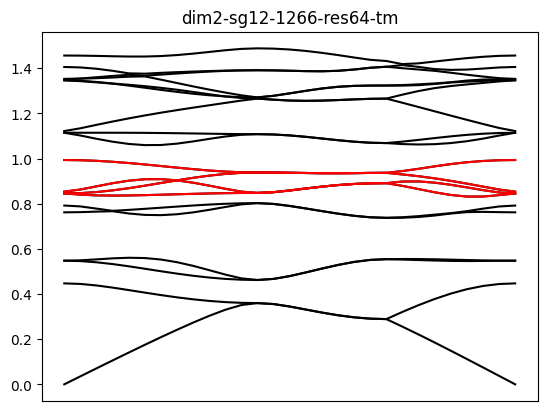

(Any[], Any[])

In [361]:
band_data = readdlm("./dispersions/output/dim2-sg12-639-res64-tm-dispersion.out", ',')[:, 6:6+18]
plot(band_data, color="black")
plot(band_data[:, 7:10], color="red");
title("dim2-sg12-1266-res64-tm")
xticks(Float64[])
#ylim(0, 0.8)

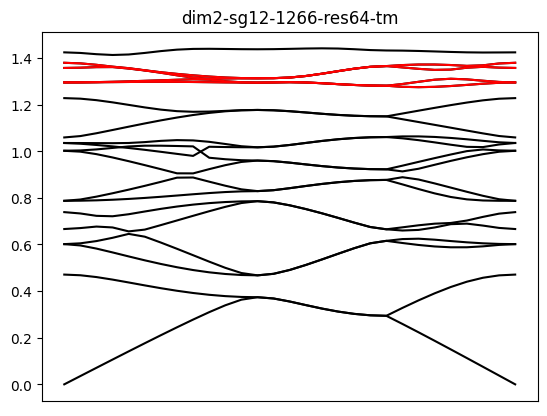

(Any[], Any[])

In [356]:
band_data = readdlm("./dispersions/output/dim2-sg12-1266-res64-tm-dispersion.out", ',')[:, 6:6+18]
plot(band_data, color="black")
plot(band_data[:, 15:18], color="red");
title("dim2-sg12-1266-res64-tm")
xticks(Float64[])
#ylim(0, 0.8)

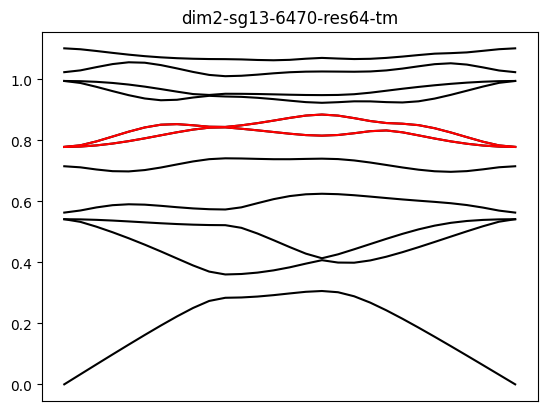

(Any[], Any[])

In [328]:
band_data = readdlm("./dispersions/output/dim2-sg14-4339-res64-tm-dispersion.out", ',')[:, 6:6+10]
plot(band_data, color="black")
plot(band_data[:, 6:7], color="red");
title("dim2-sg13-6470-res64-tm")
xticks(Float64[])
#ylim(0, 0.8)

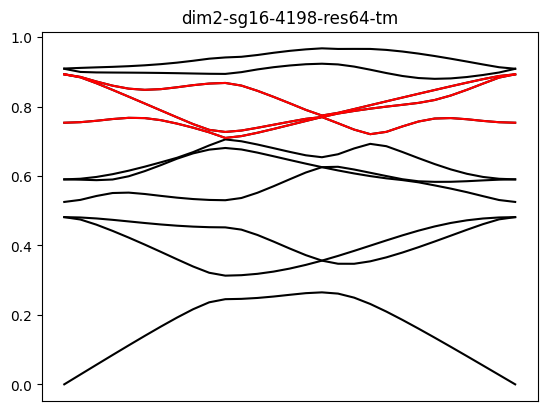

(Any[], Any[])

In [246]:
band_data = readdlm("./dispersions/output/dim2-sg16-4198-res64-tm-dispersion.out", ',')[:, 6:6+10]
plot(band_data, color="black");
plot(band_data[:, 7:9], color="red");
title("dim2-sg16-4198-res64-tm")
xticks(Float64[])
#ylim(0, 0.8)

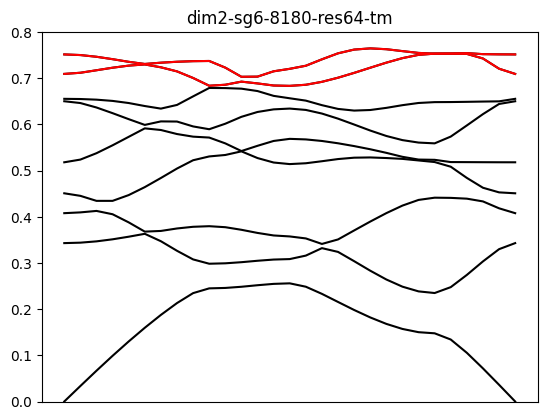

(0.0, 0.8)

In [201]:
band_data = readdlm("./dispersions/output/dim2-sg6-8180-res64-tm-dispersion.out", ',')[:, 6:6+8]
plot(band_data, color="black");
plot(band_data[:, 8:9], color="red");
title("dim2-sg6-8180-res64-tm")
xticks(Float64[])
ylim(0, 0.8)

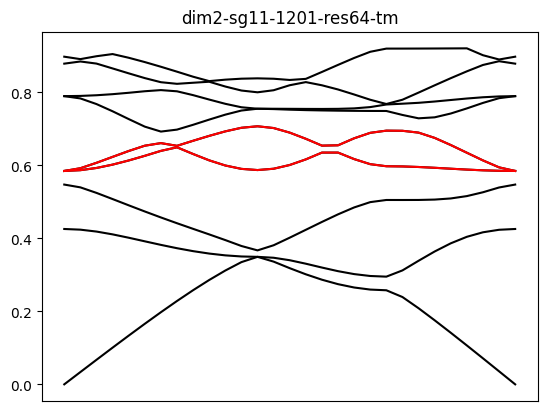

(Any[], Any[])

In [160]:
band_data = readdlm("./dispersions/output/dim2-sg11-1201-res64-tm-dispersion.out", ',')[:, 6:6+8]
plot(band_data, color="black");
plot(band_data[:, 4:5], color="red");
title("dim2-sg11-1201-res64-tm")
xticks(Float64[])
#ylim(0.8, 1)

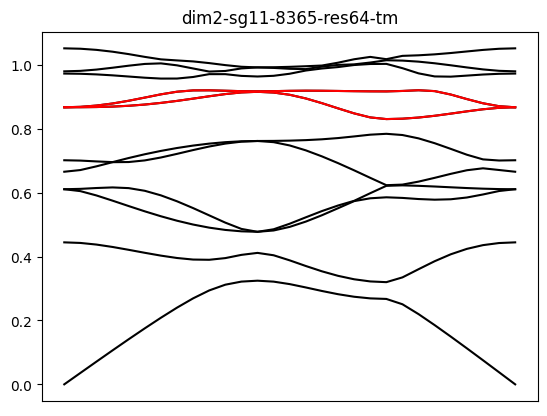

(Any[], Any[])

In [135]:
band_data = readdlm("./dispersions/output/dim2-sg11-8365-res64-tm-dispersion.out", ',')[:, 6:6+10]
plot(band_data, color="black");
plot(band_data[:, 7:8], color="red");
title("dim2-sg11-8365-res64-tm")
xticks(Float64[])
#ylim(0.8, 1)

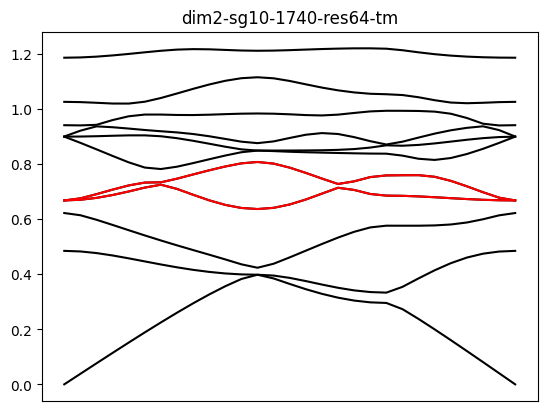

(Any[], Any[])

In [109]:
band_data = readdlm("./dispersions/output/dim2-sg10-1740-res64-tm-dispersion.out", ',')[:, 6:6+10]
plot(band_data, color="black");
plot(band_data[:, 4:5], color="red");
title("dim2-sg10-1740-res64-tm")
xticks(Float64[])
#ylim(0.8, 1)

In [71]:
println()

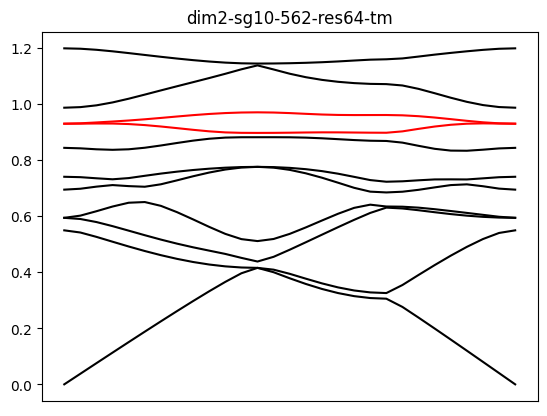

PyObject Text(0.5, 1.0, 'dim2-sg10-562-res64-tm')

In [89]:
band_data = readdlm("./dispersions/output/dim2-sg10-562-res64-tm-dispersion.out", ',')[:, 6:6+10]
plot(band_data[:, 8:9], color="red");
plot(band_data[:, 1:7], color="black");
plot(band_data[:, 10:11], color="black");
xticks(Float64[])
title("dim2-sg10-562-res64-tm")
#ylim(0.8, 1)

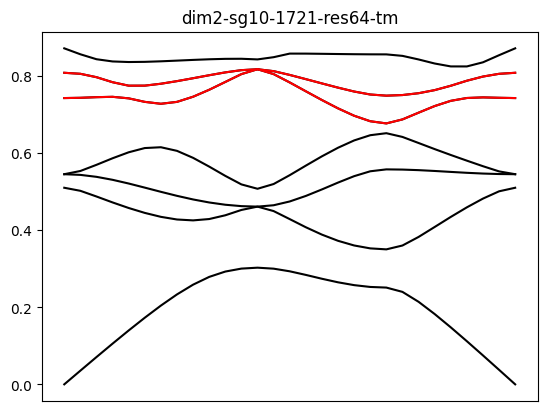

(Any[], Any[])

In [99]:
band_data = readdlm("./dispersions/output/dim2-sg10-1721-res64-tm-dispersion.out", ',')[:, 6:6+6]
plot(band_data, color="black");
plot(band_data[:, 5:6], color="red");
title("dim2-sg10-1721-res64-tm")
xticks(Float64[])

In [136]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg11-8365-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [148]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg11-1201-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [92]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg10-1721-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [102]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg10-1740-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [90]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg10-562-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [186]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg6-8180-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [192]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg6-8180-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [216]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg16-666-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [239]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg16-4198-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [273]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg17-4804-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [34]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg13-7966-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [333]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg14-2398-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

In [2]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg12-639-res64-tm-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=5), 2);

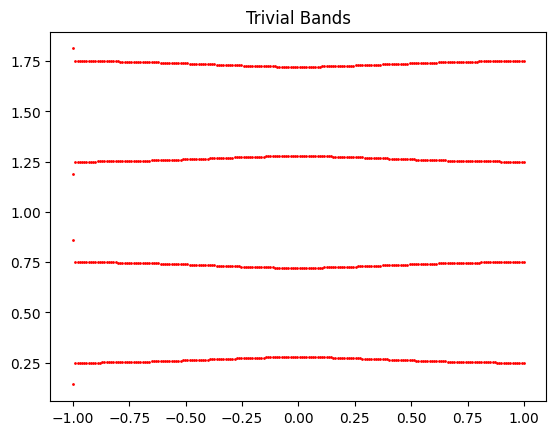

(202,)
(202,)
(202,)
(202,)


PyObject Text(0.5, 1.0, 'Trivial Bands')

In [4]:
scatter(range(-1, 1, length= 202), wilson(wilsons_revised[:, 3]), color="red",  label="band 6", s=1)
scatter(range(-1, 1, length= 202), wilson(wilsons_revised[:, 4]), color="red",  label="band 7", s =1)
scatter(range(-1, 1, length= 202), wilson(wilsons_revised[:, 5]), color="red",  label="band 6", s=1)
scatter(range(-1, 1, length= 202), wilson(wilsons_revised[:, 6]), color="red",  label="band 7", s =1)
title("Trivial Bands")

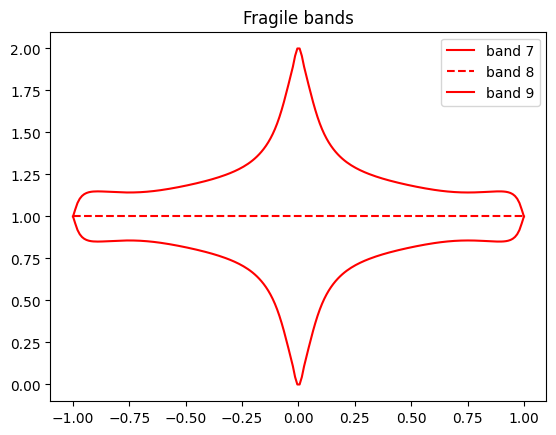

(202,)
(202,)
(202,)


PyObject Text(0.5, 1.0, 'Fragile bands')

In [242]:
plot(range(-1, 1, length= 202), wilson(wilsons_revised[:, 1]), color="red",  label="band 7")
plot(range(-1, 1, length= 202), wilson(wilsons_revised[:, 2]), color="red", linestyle="dashed",  label="band 8")
plot(range(-1, 1, length= 202), wilson(wilsons_revised[:, 3]), color="red",  label="band 9")

legend()
title("Fragile bands")
#ylim(, 2)

In [20]:
wilsons_revised[:, 1]

20-element Vector{Float64}:
 1.0
 0.99085
 0.97137
 0.95252
 0.93822
 0.92844
 0.92238
 0.91946
 0.91936
 0.91896
 0.8912
 0.80062
 0.70388
 0.63769
 0.5928
 0.55545
 0.51595
 0.46719
 0.40494
 0.33072

In [38]:
wilsons_revised[:, 4]

30-element Vector{Float64}:
 1.0
 1.00222
 1.00787
 1.01486
 1.02148
 1.02688
 1.03091
 1.03373
 1.03565
 1.03697
 1.03802
 1.03914
 1.04081
 ⋮
 1.13519
 1.17408
 1.21457
 1.25412
 1.29217
 1.32984
 1.36924
 1.41301
 1.46377
 1.52348
 1.59236
 1.66796

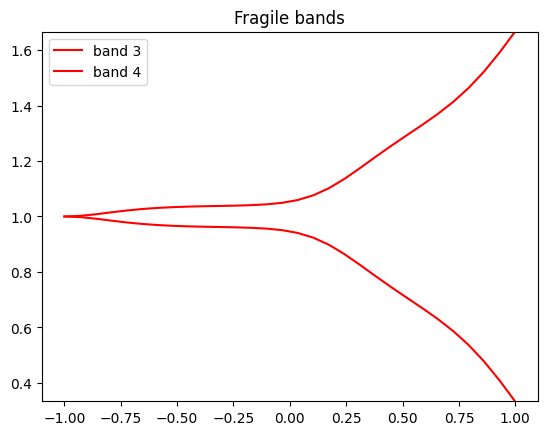

(0.3333333333333333, 1.6666666666666665)

In [36]:
plot(range(-1, 1, length= 30), wilsons_revised[:, 3], color="red",  label="band 3")
plot(range(-1, 1, length= 30), wilsons_revised[:, 4], color="red",  label="band 4")
legend()
title("Fragile bands")
ylim(1/3, 1+2/3)

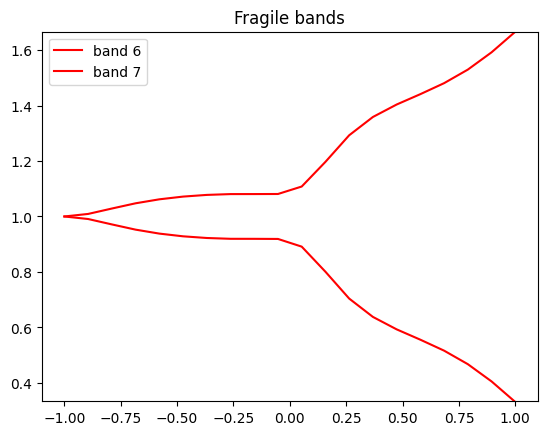

(0.3333333333333333, 1.6666666666666665)

In [21]:
plot(range(-1, 1, length= 20), wilsons_revised[:, 1], color="red",  label="band 6")
plot(range(-1, 1, length= 20), wilsons_revised[:, 2], color="red",  label="band 7")
legend()
title("Fragile bands")
ylim(1/3, 1+2/3)

In [3]:
function wilson(loop::Vector{<:Float64})
    correct_phase = similar(loop)
    println(size(correct_phase))
    for (i, phase) in enumerate(loop)
        if !iszero(phase) && !isequal(phase, 2)
            correct_phase[i] = phase
        else
            try
            if abs(loop[i-3]) < abs(2 - loop[i-3])
                correct_phase[i] = 0
            else
                correct_phase[i] = 2
            end
            catch
            if abs(loop[i+3]) < abs(2 - loop[i+3])
                correct_phase[i] = 0
            else
                correct_phase[i] = 2
            end
            end

        end
    end
    return correct_phase
end
    

wilson (generic function with 1 method)

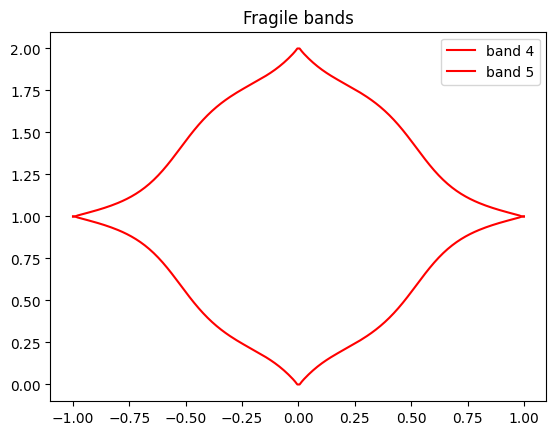

(202,)
0.01722
0.0
(202,)
1.98278
0.0


PyObject Text(0.5, 1.0, 'Fragile bands')

In [105]:
plot(range(-1, 1, length= 202), wilson(wilsons_revised[:, 1]), color="red",  label="band 4")
plot(range(-1, 1, length= 202), wilson(wilsons_revised[:, 2]), color="red",  label="band 5")
legend()
title("Fragile bands")

In [69]:
wilson_loop = readdlm("wilson_loops/output/dim2-sg10-20132-res64-te-phases.out", ',')[:, 7:end];
wilsons_revised =  mod.(round.(wilson_loop/pi .+ 1, digits=2), 2);

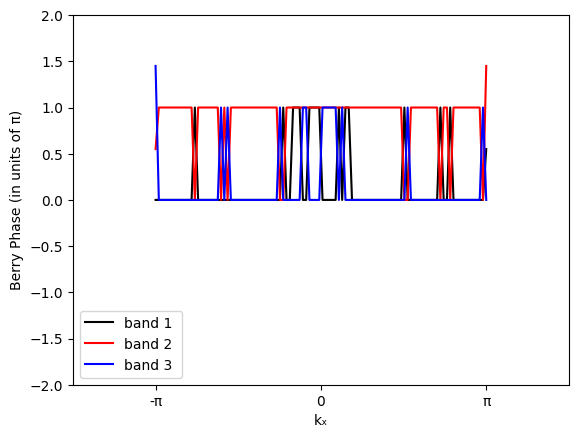

PyObject Text(0.5, 24.0, 'kₓ')

In [106]:
plot(range(-1, 1, length= 102), wilsons_revised[:, 1], color="black", label="band 1")
plot(range(-1, 1, length= 102), wilsons_revised[:, 2], color="red",  label="band 2")
plot(range(-1, 1, length= 102), wilsons_revised[:, 3], color="blue",  label = "band 3 ")
ylim(-2, 2)
legend()
ylabel("Berry Phase (in units of π)")
xlim(-1.5, 1.5)
xticks([-1, 0, 1], ["-π", "0", "π"])
xlabel("kₓ")

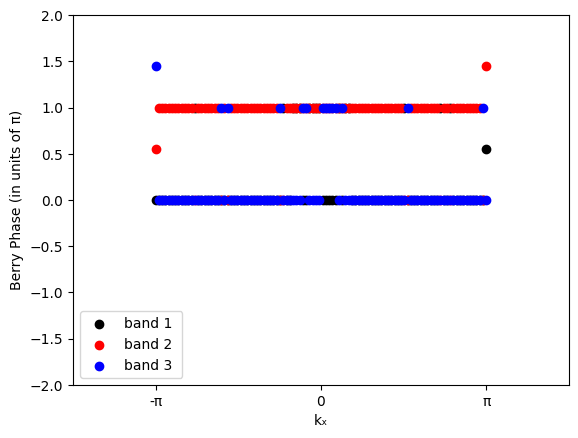

PyObject Text(0.5, 24.0, 'kₓ')

In [104]:
scatter(range(-1, 1, length= 102), wilsons_revised[:, 1], color="black", label="band 1")
scatter(range(-1, 1, length= 102), wilsons_revised[:, 2], color="red",  label="band 2")
scatter(range(-1, 1, length= 102), wilsons_revised[:, 3], color="blue",  label = "band 3 ")
ylim(-2, 2)
legend()
ylabel("Berry Phase (in units of π)")
xlim(-1.5, 1.5)
xticks([-1, 0, 1], ["-π", "0", "π"])
xlabel("kₓ")

In [99]:
wilsons_revised[[1, 21], 4:7]

2×4 Matrix{Float64}:
 0.11  0.89  1.0  0.0
 1.0   1.0   0.0  0.0

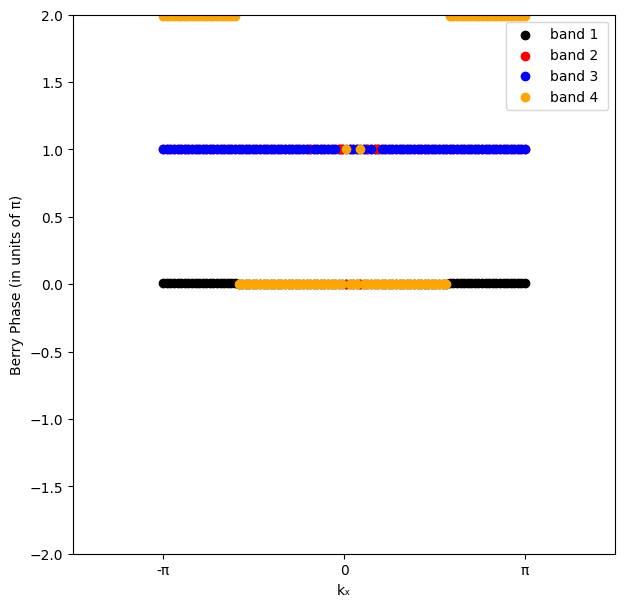

PyObject Text(0.5, 24.000000000000007, 'kₓ')

In [105]:
figure(figsize=(7, 7))
scatter(range(-1, 1, length= 102), wilsons_revised[:, 4], color="black", label="band 1")
scatter(range(-1, 1, length= 102), wilsons_revised[:, 5], color="red",  label="band 2")
scatter(range(-1, 1, length= 102), wilsons_revised[:, 6], color="blue",  label = "band 3 ")
scatter(range(-1, 1, length= 102), wilsons_revised[:, 7], color="orange",  label="band 4")
ylim(-2, 2)
legend()
ylabel("Berry Phase (in units of π)")
xlim(-1.5, 1.5)
xticks([-1, 0, 1], ["-π", "0", "π"])
xlabel("kₓ")

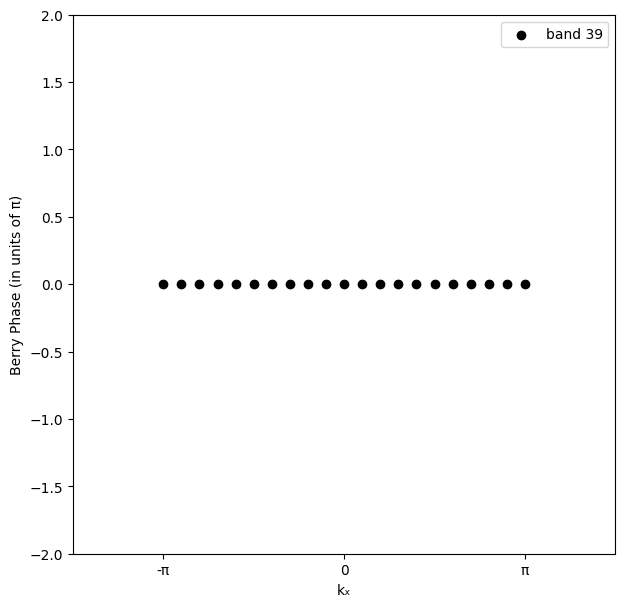

PyObject Text(0.5, 24.000000000000007, 'kₓ')

In [86]:
figure(figsize=(7, 7))
scatter(range(-1, 1, length= 21), mod.(round.(wilson_loop[:, 8]/pi .+ 1, digits=3), 2), color="black", label="band 39")
ylim(-2, 2)
legend()
ylabel("Berry Phase (in units of π)")
xlim(-1.5, 1.5)
xticks([-1, 0, 1], ["-π", "0", "π"])
xlabel("kₓ")

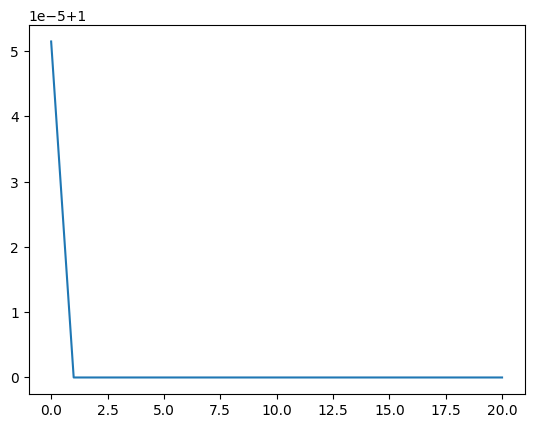

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9337ccf070>

In [44]:
plot(mod.(sum(wilson_loop/pi, dims=2), 2))

In [38]:
collect(range(-1, 1, length= 21))

21-element Vector{Float64}:
 -1.0
 -0.9
 -0.8
 -0.7
 -0.6
 -0.5
 -0.4
 -0.3
 -0.2
 -0.1
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0